# **Упражнение 2.**
Выполнить парсинг веб-страниц с помощью *Beautiful Soup* и *Pandas* открытых источников данных, согласно варианта (вариант 5):
ETF от FinEx — https://finex-etf.ru/products/

**FinEx** — биржевые инвестиционные фонды (ETF).


In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Так как на нужном сайте есть ссылка *Скачать историческую динамику* на файл.xlsx, то необходимо найти ссылку и обратиться к данным из этого файла.

In [2]:
# Отправляем GET запрос
response = requests.get("https://finex-etf.ru/products")

#Проверяем, что запрос успешен
if response.status_code == 200:
    #Инициализируем BeautifulSoup для парсинга HTML
    soup = BeautifulSoup(response.text, "html.parser")
    #Находим все ссылки на странице
    links = soup.find_all("a")

    #Ищем ссылку на скачивание исторической динамики
    download_link = None
    for link in links:
        if "Скачать историческую динамику" in link.text:
            download_link = link.get("href")
            break

    if download_link:
        #Проверяем, что ссылка - относительный путь, и корректируем, если это так
        if not download_link.startswith("http"):
            download_link = url + download_link
        print("Найдена ссылка для скачивания:", download_link)

        #Скачиваем файл
        file_response = requests.get(download_link)

        #Проверяем успешность загрузки файла
        if file_response.status_code == 200:
            #Сохраняем файл на диск
            with open("downloaded_file.xlsx", "wb") as file:
                file.write(file_response.content)
            #Читаем файл Excel и выводим содержимое
            data = pd.read_excel("downloaded_file.xlsx")
        else:
            print("Ошибка при загрузке файла")
    else:
        print("Ссылка на скачивание не найдена.")
else:
    print("Ошибка при загрузке веб-страницы")

Найдена ссылка для скачивания: https://cdn.finexetf.com/historical-dynamic.xls


In [3]:
data.head(10)

,Дата,FXBC in USD,Дата.1,FXEM in USD,Дата.2,FXRE in USD,Дата.3,FXRD in RUB,Дата.4,FXES in USD,...,Дата.21,FXKZ in KZT,Дата.22,FXRB in RUB,Дата.23,FXAU in USD,Дата.24,FXUK in USD,Дата.25,FXJP in USD
0,09.02.2022,1.000000,14.12.2021,1.000000,16.11.2021,1.000000,10.08.2021,100.000000,12.07.2021,0.994740,...,02.10.2018,1000.0000,06.02.2013,10.000000,22.10.2013,30.0000,14.10.2013,19.0000,22.10.2013,30.00000
1,10.02.2022,0.982450,15.12.2021,1.000351,17.11.2021,1.005000,11.08.2021,100.585476,13.07.2021,0.998749,...,03.10.2018,1009.3830,07.02.2013,10.148287,23.10.2013,29.6514,15.10.2013,19.1173,23.10.2013,29.80240
2,11.02.2022,0.936634,16.12.2021,1.014485,18.11.2021,1.006308,12.08.2021,100.588519,14.07.2021,0.986752,...,04.10.2018,1008.4855,08.02.2013,10.114167,24.10.2013,29.6460,16.10.2013,19.1819,24.10.2013,29.93730
3,14.02.2022,0.921058,17.12.2021,1.013523,19.11.2021,1.000051,13.08.2021,100.826705,15.07.2021,0.977212,...,05.10.2018,1011.5582,11.02.2013,10.118638,25.10.2013,29.7142,17.10.2013,19.1982,25.10.2013,29.28990
4,15.02.2022,0.975403,20.12.2021,0.991117,22.11.2021,0.995743,16.08.2021,100.912359,16.07.2021,0.972078,...,08.10.2018,1009.1969,12.02.2013,10.119975,28.10.2013,29.9804,18.10.2013,19.3351,28.10.2013,29.69690
5,16.02.2022,0.968828,21.12.2021,1.003344,23.11.2021,1.003826,17.08.2021,100.832271,19.07.2021,0.971538,...,09.10.2018,1008.3590,13.02.2013,10.119454,29.10.2013,29.6316,21.10.2013,19.4259,29.10.2013,29.46200
6,17.02.2022,0.910182,22.12.2021,1.007612,24.11.2021,1.015580,18.08.2021,100.922856,20.07.2021,0.970843,...,10.10.2018,1012.6715,14.02.2013,10.120811,30.10.2013,29.6869,22.10.2013,19.5495,30.10.2013,29.75130
7,18.02.2022,0.880315,24.12.2021,1.020066,26.11.2021,0.985973,19.08.2021,100.730641,21.07.2021,0.982593,...,11.10.2018,996.6971,15.02.2013,10.122773,31.10.2013,29.5627,23.10.2013,19.5043,31.10.2013,29.50910
8,21.02.2022,0.880125,29.12.2021,1.021404,29.11.2021,0.995118,20.08.2021,100.928065,22.07.2021,0.984787,...,12.10.2018,998.6645,18.02.2013,10.127517,01.11.2013,29.3969,24.10.2013,19.6195,01.11.2013,29.06250
9,22.02.2022,0.844361,30.12.2021,1.023683,30.11.2021,0.974277,23.08.2021,101.081775,23.07.2021,0.975928,...,15.10.2018,1003.4079,19.02.2013,10.134623,04.11.2013,29.4735,25.10.2013,19.6456,04.11.2013,29.11408


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2681 entries, 0 to 2680
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Дата         510 non-null    object 
 1   FXBC in USD  510 non-null    float64
 2   Дата.1       546 non-null    object 
 3   FXEM in USD  546 non-null    float64
 4   Дата.2       548 non-null    object 
 5   FXRE in USD  548 non-null    float64
 6   Дата.3       551 non-null    object 
 7   FXRD in RUB  551 non-null    float64
 8   Дата.4       656 non-null    object 
 9   FXES in USD  656 non-null    float64
 10  Дата.5       591 non-null    object 
 11  FXIP in RUB  591 non-null    float64
 12  Дата.6       607 non-null    object 
 13  FXTP in USD  607 non-null    float64
 14  Дата.7       625 non-null    object 
 15  FXFA in USD  625 non-null    float64
 16  Дата.8       717 non-null    object 
 17  FXDM in USD  717 non-null    float64
 18  Дата.9       2681 non-null   object 
 19  FXGD i

Необходимо переименовать все столбцы с датой в "Дата"

In [5]:
columns = data.columns
columns

Index(['Дата', 'FXBC in USD', 'Дата.1', 'FXEM in USD', 'Дата.2', 'FXRE in USD',
       'Дата.3', 'FXRD in RUB', 'Дата.4', 'FXES in USD', 'Дата.5',
       'FXIP in RUB', 'Дата.6', 'FXTP in USD', 'Дата.7', 'FXFA in USD',
       'Дата.8', 'FXDM in USD', 'Дата.9', 'FXGD in USD', 'Дата.10',
       'FXWO in USD', 'Дата.11', 'FXRW in RUB', 'Дата.12', 'FXTB in USD',
       'Дата.13', 'FXMM in RUB', 'Дата.14', 'FXRL in USD', 'Дата.15',
       'FXIM in USD', 'Дата.16', 'FXIT in USD', 'Дата.17', 'FXUS in USD',
       'Дата.18', 'FXRU in USD', 'Дата.19', 'FXDE in EUR', 'Дата.20',
       'FXCN in USD', 'Дата.21', 'FXKZ in KZT', 'Дата.22', 'FXRB in RUB',
       'Дата.23', 'FXAU in USD', 'Дата.24', 'FXUK in USD', 'Дата.25',
       'FXJP in USD'],
      dtype='object')

In [6]:
#Находим все столбцы с шаблоном "Дата." и переименовываем их в "Дата"
for column in data.columns:
    if 'Дата.' in column:
        data = data.rename(columns={column: 'Дата'})
data

,Дата,FXBC in USD,Дата,FXEM in USD,Дата,FXRE in USD,Дата,FXRD in RUB,Дата,FXES in USD,...,Дата,FXKZ in KZT,Дата,FXRB in RUB,Дата,FXAU in USD,Дата,FXUK in USD,Дата,FXJP in USD
0,09.02.2022,1.000000,14.12.2021,1.000000,16.11.2021,1.000000,10.08.2021,100.000000,12.07.2021,0.994740,...,02.10.2018,1000.0000,06.02.2013,10.000000,22.10.2013,30.0000,14.10.2013,19.0000,22.10.2013,30.0000
1,10.02.2022,0.982450,15.12.2021,1.000351,17.11.2021,1.005000,11.08.2021,100.585476,13.07.2021,0.998749,...,03.10.2018,1009.3830,07.02.2013,10.148287,23.10.2013,29.6514,15.10.2013,19.1173,23.10.2013,29.8024
2,11.02.2022,0.936634,16.12.2021,1.014485,18.11.2021,1.006308,12.08.2021,100.588519,14.07.2021,0.986752,...,04.10.2018,1008.4855,08.02.2013,10.114167,24.10.2013,29.6460,16.10.2013,19.1819,24.10.2013,29.9373
3,14.02.2022,0.921058,17.12.2021,1.013523,19.11.2021,1.000051,13.08.2021,100.826705,15.07.2021,0.977212,...,05.10.2018,1011.5582,11.02.2013,10.118638,25.10.2013,29.7142,17.10.2013,19.1982,25.10.2013,29.2899
4,15.02.2022,0.975403,20.12.2021,0.991117,22.11.2021,0.995743,16.08.2021,100.912359,16.07.2021,0.972078,...,08.10.2018,1009.1969,12.02.2013,10.119975,28.10.2013,29.9804,18.10.2013,19.3351,28.10.2013,29.6969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для дальнейшей работы необходимо разделить таблицу на несколько таблиц состоящих из 2-х столбцов

In [7]:
#Разделяем DataFrame на таблицы с двумя столбцами
tables = []
for i in range(0, len(columns), 2):
    sub_df = data.iloc[:, i:i+2]  #Выбираем по два столбца
    tables.append(sub_df)

for table in tables:
    print(table)

            Дата  FXBC in USD
0     09.02.2022     1.000000
1     10.02.2022     0.982450
2     11.02.2022     0.936634
3     14.02.2022     0.921058
4     15.02.2022     0.975403
...          ...          ...
2676         NaN          NaN
2677         NaN          NaN
2678         NaN          NaN
2679         NaN          NaN
2680         NaN          NaN

[2681 rows x 2 columns]
            Дата  FXEM in USD
0     14.12.2021     1.000000
1     15.12.2021     1.000351
2     16.12.2021     1.014485
3     17.12.2021     1.013523
4     20.12.2021     0.991117
...          ...          ...
2676         NaN          NaN
2677         NaN          NaN
2678         NaN          NaN
2679         NaN          NaN
2680         NaN          NaN

[2681 rows x 2 columns]
            Дата  FXRE in USD
0     16.11.2021     1.000000
1     17.11.2021     1.005000
2     18.11.2021     1.006308
3     19.11.2021     1.000051
4     22.11.2021     0.995743
...          ...          ...
2676         NaN    

In [8]:
#Определяем количество созданных таблиц
num_tables = len(tables)

#Выводим количество созданных таблиц
print("Количество созданных таблиц:", num_tables)

Количество созданных таблиц: 26


In [7]:
#Разделение на таблицы по два столбца
df_split = [data.iloc[:, i:i+2].copy() for i in range(0, data.shape[1], 2)]

#Удаление пустых строк
for i, df_part in enumerate(df_split):
    df_split[i] = df_part.dropna()

#Изменение типов столбцов
for i, df_part in enumerate(df_split):
    df_part.iloc[:, 0] = pd.to_datetime(df_part.iloc[:, 0])

#Результат
for i, df_part in enumerate(df_split):
    print(f"Таблица {i+1}:")
    print(df_part)

<ipython-input-7-2d0387886c75>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_part.iloc[:, 0] = pd.to_datetime(df_part.iloc[:, 0])
<ipython-input-7-2d0387886c75>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_part.iloc[:, 0] = pd.to_datetime(df_part.iloc[:, 0])
<ipython-input-7-2d0387886c75>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_part.iloc[:, 0] = pd.to_datetime(df_part.iloc[:, 0])
<ipython-input-7-2d0387886c75>:10: DeprecationWarning: In a future ver

Таблица 1:
          Дата  FXBC in USD
0   2022-09-02     1.000000
1   2022-10-02     0.982450
2   2022-11-02     0.936634
3   2022-02-14     0.921058
4   2022-02-15     0.975403
..         ...          ...
505 2024-08-02     0.500853
506 2024-09-02     0.531888
507 2024-12-02     0.561875
508 2024-02-13     0.544660
509 2024-02-14     0.589487

[510 rows x 2 columns]
Таблица 2:
          Дата  FXEM in USD
0   2021-12-14     1.000000
1   2021-12-15     1.000351
2   2021-12-16     1.014485
3   2021-12-17     1.013523
4   2021-12-20     0.991117
..         ...          ...
541 2024-08-02     0.927162
542 2024-09-02     0.926561
543 2024-12-02     0.929468
544 2024-02-13     0.926311
545 2024-02-14     0.924778

[546 rows x 2 columns]
Таблица 3:
          Дата  FXRE in USD
0   2021-11-16     1.000000
1   2021-11-17     1.005000
2   2021-11-18     1.006308
3   2021-11-19     1.000051
4   2021-11-22     0.995743
..         ...          ...
543 2024-08-02     0.829150
544 2024-09-02     0.83

Теперь необходимо объединить все таблицы по столбцу с датой

In [8]:
#объединенная таблица со всеми датами и показателями
merged_data = pd.DataFrame({'Дата': pd.date_range(start='2023-02-13', end='2024-02-13')})

#объединение по столбцу 'Дата'
for df_part in df_split:
    merged_data = pd.merge(merged_data, df_part, on='Дата', how='left')

merged_data

,Дата,FXBC in USD,FXEM in USD,FXRE in USD,FXRD in RUB,FXES in USD,FXIP in RUB,FXTP in USD,FXFA in USD,FXDM in USD,...,FXIT in USD,FXUS in USD,FXRU in USD,FXDE in EUR,FXCN in USD,FXKZ in KZT,FXRB in RUB,FXAU in USD,FXUK in USD,FXJP in USD
0,2023-02-13,0.366359,0.864861,0.868196,46.553906,0.714025,51.588692,0.916522,0.917784,1.009691,...,126.6149,0.743286,NaN,0.331450,33.4365,1794.3774,NaN,NaN,NaN,NaN
1,2023-02-14,0.377950,0.866961,0.860503,46.319621,0.722884,51.288943,0.913015,0.914987,1.011192,...,127.2461,0.743695,NaN,0.331262,33.2422,1794.6301,NaN,NaN,NaN,NaN
2,2023-02-15,0.400769,0.860357,0.863505,46.822834,0.734934,51.954557,0.912813,0.912876,1.005222,...,128.2653,0.746746,NaN,0.333742,32.9152,1794.8410,NaN,NaN,NaN,NaN
3,2023-02-16,0.388844,0.865871,0.855650,46.994198,0.730539,52.282164,0.912473,0.910137,1.006642,...,126.0326,0.736260,NaN,0.333905,33.0835,1790.6598,NaN,NaN,NaN,NaN
4,2023-02-17,0.390439,0.857518,0.852359,46.398479,0.717384,51.799698,0.912202,0.906700,1.001678,...,124.5544,0.733879,NaN,0.332770,32.4918,1792.1574,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2024-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2024-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим строки, где все значения NaN

In [9]:
columns_to_check = merged_data.columns[1:]
df = merged_data.dropna(subset=columns_to_check, how='all')
df

,Дата,FXBC in USD,FXEM in USD,FXRE in USD,FXRD in RUB,FXES in USD,FXIP in RUB,FXTP in USD,FXFA in USD,FXDM in USD,...,FXIT in USD,FXUS in USD,FXRU in USD,FXDE in EUR,FXCN in USD,FXKZ in KZT,FXRB in RUB,FXAU in USD,FXUK in USD,FXJP in USD
0,2023-02-13,0.366359,0.864861,0.868196,46.553906,0.714025,51.588692,0.916522,0.917784,1.009691,...,126.6149,0.743286,NaN,0.331450,33.4365,1794.3774,NaN,NaN,NaN,NaN
1,2023-02-14,0.377950,0.866961,0.860503,46.319621,0.722884,51.288943,0.913015,0.914987,1.011192,...,127.2461,0.743695,NaN,0.331262,33.2422,1794.6301,NaN,NaN,NaN,NaN
2,2023-02-15,0.400769,0.860357,0.863505,46.822834,0.734934,51.954557,0.912813,0.912876,1.005222,...,128.2653,0.746746,NaN,0.333742,32.9152,1794.8410,NaN,NaN,NaN,NaN
3,2023-02-16,0.388844,0.865871,0.855650,46.994198,0.730539,52.282164,0.912473,0.910137,1.006642,...,126.0326,0.736260,NaN,0.333905,33.0835,1790.6598,NaN,NaN,NaN,NaN
4,2023-02-17,0.390439,0.857518,0.852359,46.398479,0.717384,51.799698,0.912202,0.906700,1.001678,...,124.5544,0.733879,NaN,0.332770,32.4918,1792.1574,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2024-01-30,0.480891,0.915617,0.832153,61.225413,0.862773,63.868302,0.933084,0.992574,1.101866,...,183.5892,0.897208,NaN,0.352164,24.9548,2345.6250,NaN,NaN,NaN,NaN
352,2024-01-31,0.470406,0.913235,0.824977,61.360478,0.856826,64.297611,0.939865,0.995303,1.107527,...,179.0598,0.882642,NaN,0.351007,24.6429,2353.9550,NaN,NaN,NaN,NaN
353,2024-02-01,0.538858,0.940489,0.875657,61.237934,0.825499,64.804894,0.933943,0.979330,1.088907,...,168.6082,0.863206,NaN,0.348824,27.2164,NaN,NaN,NaN,NaN,NaN
354,2024-02-02,0.473659,0.928646,0.828981,61.715150,0.886339,64.329775,0.930972,0.991088,1.096431,...,184.8970,0.903250,NaN,0.351053,24.7305,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 365
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Дата         241 non-null    datetime64[ns]
 1   FXBC in USD  241 non-null    float64       
 2   FXEM in USD  241 non-null    float64       
 3   FXRE in USD  235 non-null    float64       
 4   FXRD in RUB  234 non-null    float64       
 5   FXES in USD  241 non-null    float64       
 6   FXIP in RUB  234 non-null    float64       
 7   FXTP in USD  234 non-null    float64       
 8   FXFA in USD  234 non-null    float64       
 9   FXDM in USD  241 non-null    float64       
 10  FXGD in USD  240 non-null    float64       
 11  FXWO in USD  241 non-null    float64       
 12  FXRW in RUB  241 non-null    float64       
 13  FXTB in USD  234 non-null    float64       
 14  FXMM in RUB  234 non-null    float64       
 15  FXRL in USD  0 non-null      float64       
 16  FXIM in 

Для дальнейшего анализа и визуализации будем использовать несколько столбцов, а именно:
*  FXBC in USD - Акции компаний экосистемы блокчейн,
*  FXEM in USD - Акции развивающихся рынков без Китая и Индии,
*  FXES in USD - Акции / Индустрия видеоигр и киберспорта,
*  FXDM in USD - Акции развитых рынков без США,
*  FXWO in USD - Акции глобального рынка.




In [11]:
columns = ['Дата','FXBC in USD', 'FXEM in USD','FXES in USD','FXDM in USD','FXWO in USD']
result_df = df[columns]
result_df.head(10)

,Дата,FXBC in USD,FXEM in USD,FXES in USD,FXDM in USD,FXWO in USD
0,2023-02-13,0.366359,0.864861,0.714025,1.009691,0.021466
1,2023-02-14,0.377950,0.866961,0.722884,1.011192,0.021523
2,2023-02-15,0.400769,0.860357,0.734934,1.005222,0.021431
3,2023-02-16,0.388844,0.865871,0.730539,1.006642,0.021340
4,2023-02-17,0.390439,0.857518,0.717384,1.001678,0.021192
7,2023-02-20,0.389646,0.860952,0.719649,1.005096,0.021272
8,2023-02-21,0.373592,0.856350,0.701860,1.000504,0.021014
9,2023-02-22,0.370819,0.845484,0.699980,0.992187,0.020893
10,2023-02-23,0.371358,0.853182,0.703897,0.988663,0.020926
11,2023-02-24,0.359729,0.839060,0.688429,0.975244,0.020621


In [12]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Дата         241 non-null    datetime64[ns]
 1   FXBC in USD  241 non-null    float64       
 2   FXEM in USD  241 non-null    float64       
 3   FXES in USD  241 non-null    float64       
 4   FXDM in USD  241 non-null    float64       
 5   FXWO in USD  241 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.2 KB


**Визуализация**

In [13]:
#сводная таблицы по месяцам и году
pivot_table = result_df.groupby(pd.Grouper(key='Дата', freq='M')).mean().reset_index()
pivot_table['Дата'] = pivot_table['Дата'].dt.strftime('%B %Y')
pivot_table

,Дата,FXBC in USD,FXEM in USD,FXES in USD,FXDM in USD,FXWO in USD
0,February 2023,0.376441,0.853736,0.708877,0.997100,0.021094
1,March 2023,0.358646,0.842379,0.747163,0.985762,0.021336
2,April 2023,0.387046,0.864692,0.762718,1.028258,0.022109
3,May 2023,0.379634,0.862012,0.771154,1.017453,0.022234
4,June 2023,0.397882,0.886734,0.795804,1.025982,0.022753
5,July 2023,0.474942,0.910327,0.825202,1.045954,0.023298
6,August 2023,0.411504,0.883055,0.782549,1.015850,0.022673
7,September 2023,0.369614,0.868677,0.756995,1.010038,0.022412
8,October 2023,0.367705,0.845937,0.747886,0.985836,0.021944
9,November 2023,0.404493,0.888352,0.798888,1.029578,0.023140


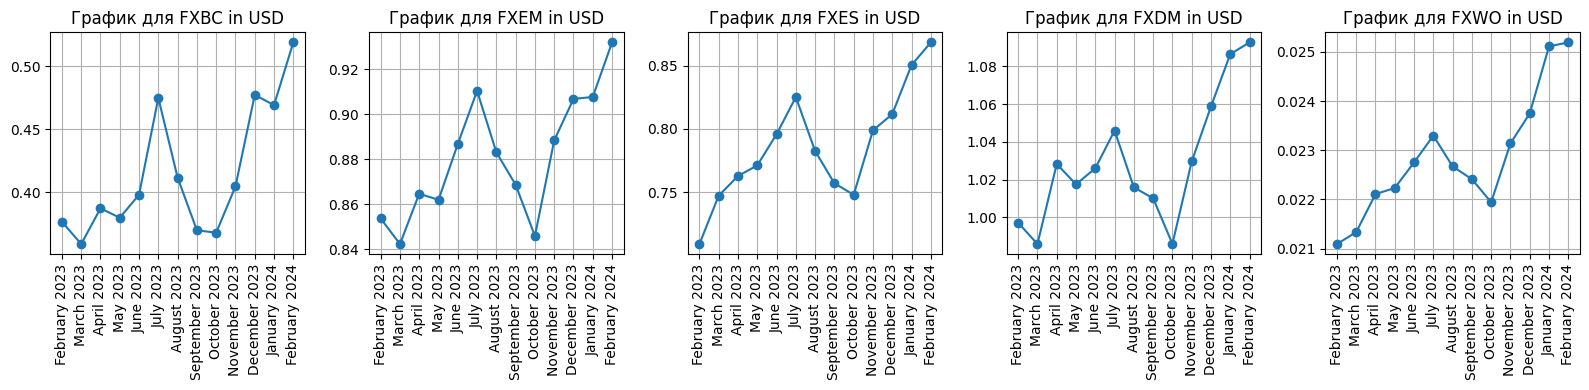

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(pivot_table.columns[1:]), figsize=(16, 4))
for i, column in enumerate(pivot_table.columns[1:]):
    axs[i].plot(pivot_table['Дата'], pivot_table[column], marker='o')
    axs[i].set_title(f'График для {column}')
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [15]:
pivot_table1 = result_df.mean(numeric_only=True).to_frame().T
pivot_table1

,FXBC in USD,FXEM in USD,FXES in USD,FXDM in USD,FXWO in USD
0,0.405761,0.876915,0.781365,1.023295,0.022655


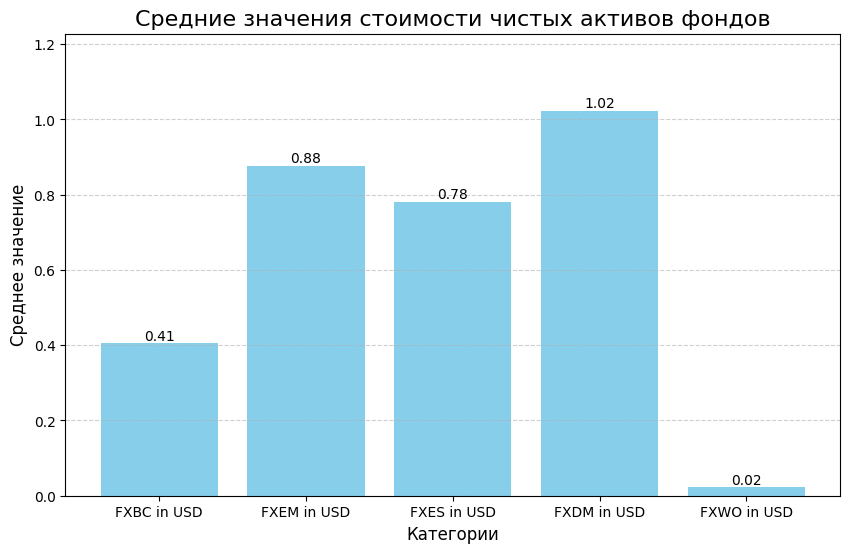

In [17]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_table1.columns, pivot_table1.iloc[0], color='skyblue')

#значения на столбцах
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

#заголовки и подписи осей
plt.title('Средние значения стоимости чистых активов фондов', fontsize=16)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Среднее значение', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, max(pivot_table1.iloc[0])*1.2)

plt.show()

# Архитектура

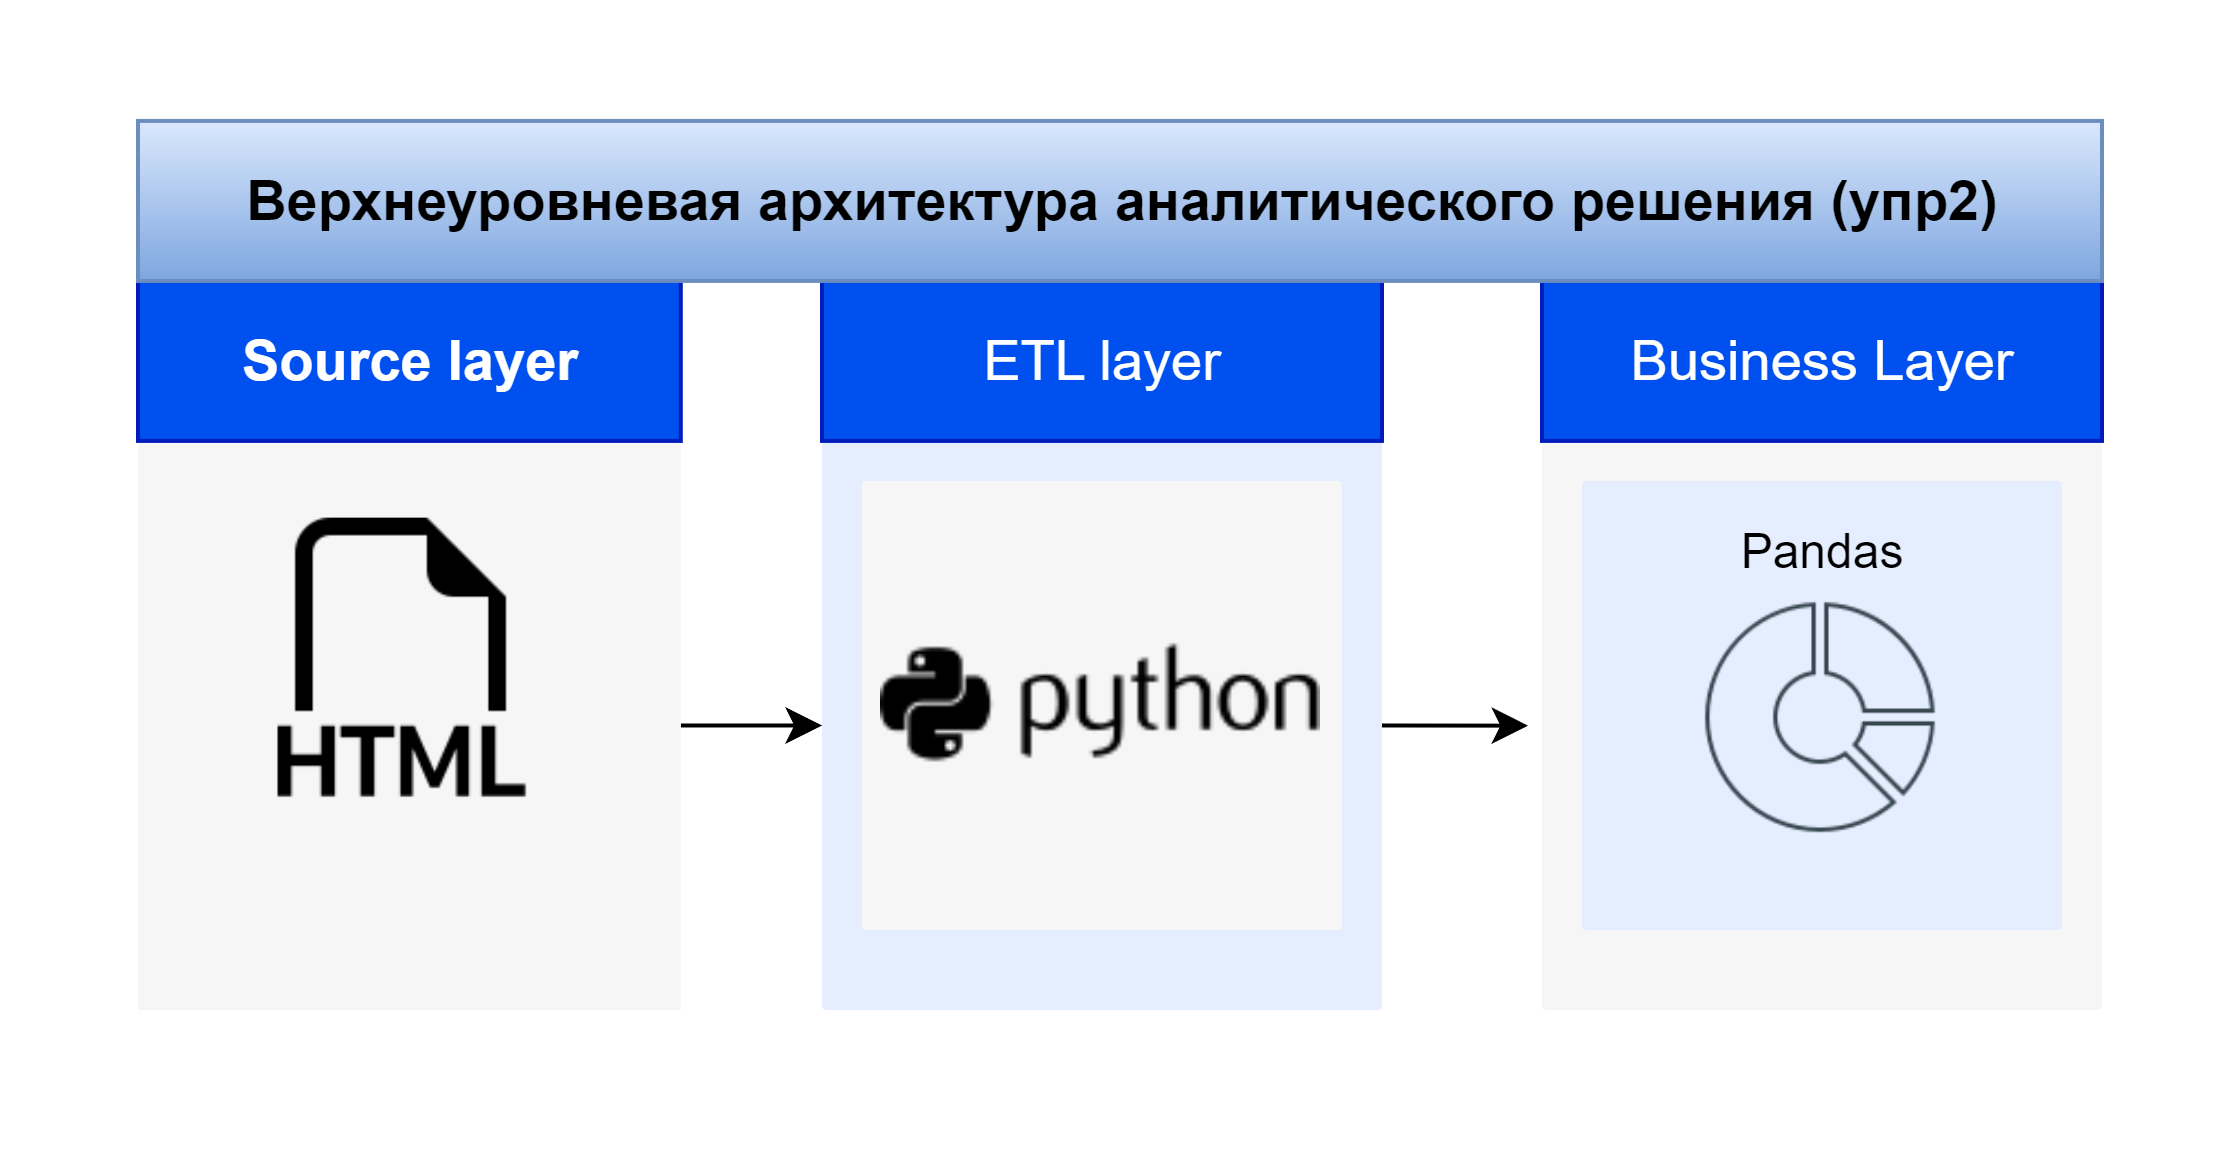